In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
data = pd.read_csv('../datasets/auto/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


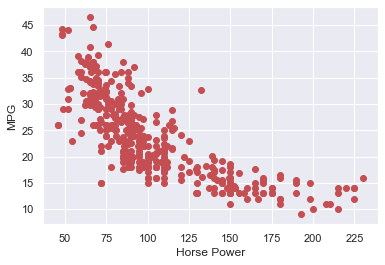

In [6]:
data['mpg'] = data['mpg'].dropna()
data['horsepower'] = data['horsepower'].dropna()

plt.plot(data['horsepower'], data['mpg'], 'ro')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.show()

 ## Intentemos un modelo lineal
 mpg = a + b * hp

In [5]:
x = data['horsepower'].fillna(data['horsepower'].mean())
y = data['mpg'].fillna(data['mpg'].mean())
# Pasamos x, con una dimension extra para que la función funcione.
x = x[:, np.newaxis]
lm = LinearRegression().fit(x, y)


C:\Users\user\AppData\Local\Temp\ipykernel_25584\2139677271.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


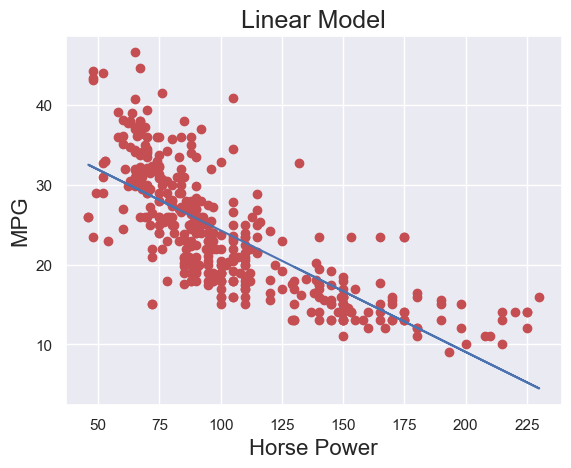

In [6]:
plt.plot(x, y, 'ro')
plt.plot(x, lm.predict(x), 'b')
plt.xlabel('Horse Power', size='16')
plt.ylabel('MPG', size='16')
plt.title('Linear Model', size='18')
plt.show()

In [7]:
lm.score(x, y)

0.574653340645025

In [8]:
SSD = np.sum((y - lm.predict(x))**2)
RSE = np.sqrt(SSD / (len(x) - 1))
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

## Intentemos un modelo cuadratico
mpg = a + b * hp**2

In [9]:
x2 = x**2

In [10]:
lm = LinearRegression().fit(x2, y)

In [13]:
lm.coef_, lm.intercept_

(array([-0.00055043]), 30.405683105007366)

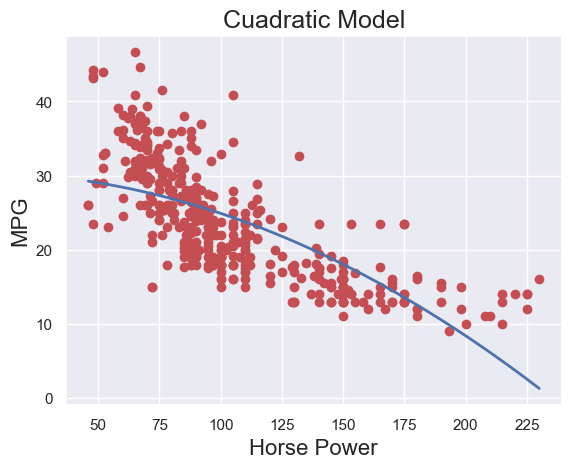

In [16]:
hp = np.linspace(min(data['horsepower']), max(data['horsepower']), 100)
mpg = 30.40568 - 0.00055043*hp**2

plt.plot(x, y, 'ro')
plt.plot(hp, mpg, 'b', lw=2)
plt.xlabel('Horse Power', size='16')
plt.ylabel('MPG', size='16')
plt.title('Cuadratic Model', size='18')
plt.show()

In [11]:
lm.score(x2, y)

0.4849887034823205

Empeoro un poquito

In [12]:
SSD = np.sum((y - lm.predict(x2))**2)
RSE = np.sqrt(SSD / (len(x2) - 1))
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

El error aumento :(

## Un modelo mezclando lineal y cuadratico
mpg = a + b * hp + c * hp**2

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [18]:
poly = PolynomialFeatures(degree=2)
x_data = poly.fit_transform(x)

lm = linear_model.LinearRegression().fit(x_data, y)

In [24]:
lm.score(x_data, y)

0.6439066584257469

In [25]:
lm.coef_, lm.intercept_

(array([ 0.        , -0.43404318,  0.00112615]), 55.026192447080355)

mpg = 55.026 - 0.43*hp + 0.00112*hp**2

In [26]:
hp = np.linspace(min(data['horsepower']), max(data['horsepower']), 100)
mpg = 55.026 - 0.43*hp + 0.00112*hp**2

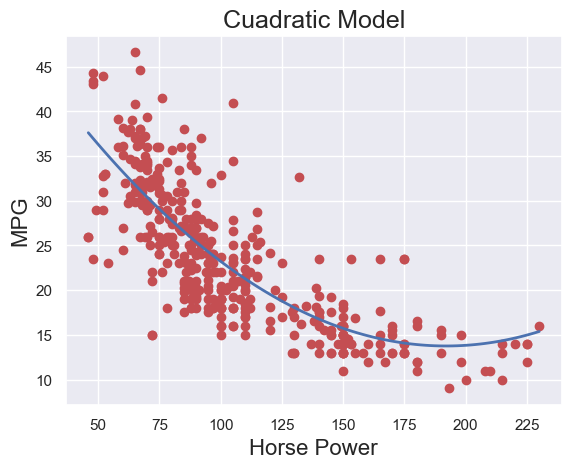

In [27]:
plt.plot(x, y, 'ro')
plt.plot(hp, mpg, 'b', lw=2)
plt.xlabel('Horse Power', size='16')
plt.ylabel('MPG', size='16')
plt.title('Cuadratic Model', size='18')
plt.show()

In [28]:
SSD = np.sum((y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD / (len(x_data) - 1))
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(8636.180643524502, 4.61778115803654, 23.51457286432162, 0.1963795466190689)

El error bajo :)

<div class='alert alert-info'>
    <h3>Quiero borrar el ultimo dato para ver si esto mejora el modelo.</h3>
</div>

In [60]:
data = pd.read_csv('../datasets/auto/auto-mpg.csv')
print(max(data['horsepower']))
data.loc[data['horsepower'] == max(data['horsepower'])].index

230.0


Int64Index([123], dtype='int64')

In [61]:
data = data.drop([123], axis=0)
max(data['horsepower'])

225.0

In [62]:
x = data['horsepower'].fillna(data['horsepower'].mean())
y = data['mpg'].fillna(data['mpg'].mean())
# Pasamos x, con una dimension extra para que la función funcione.
x = x[:, np.newaxis]

poly = PolynomialFeatures(degree=2)
x_data = poly.fit_transform(x)

lm = linear_model.LinearRegression().fit(x_data, y)
print(lm.score(x_data, y))
lm.coef_, lm.intercept_

0.6432702732703142


(array([ 0.        , -0.43219209,  0.00111757]), 54.93513407180505)

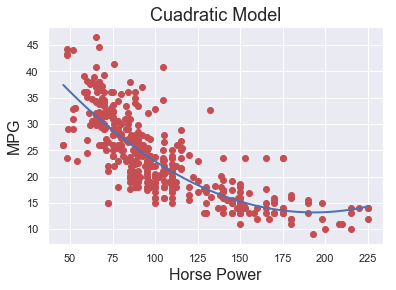

In [63]:
hp = np.linspace(min(data['horsepower']), max(data['horsepower']), 100)
mpg = 54.935 - 0.432*hp + 0.00111757*hp**2

plt.plot(x, y, 'ro')
plt.plot(hp, mpg, 'b', lw=2)
plt.xlabel('Horse Power', size='16')
plt.ylabel('MPG', size='16')
plt.title('Cuadratic Model', size='18')
plt.show()

In [64]:
SSD = np.sum((y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD / (len(x_data) - 1))
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(8631.419780234246, 4.622218130521792, 23.533501259445853, 0.19641013377329608)

El error aumento ligeramente :(

## Problema de los outliers
Puntos alejados de la tendencia general de los datos

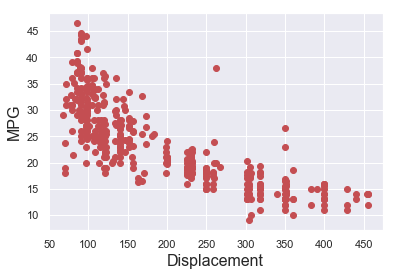

In [66]:
data = pd.read_csv('../datasets/auto/auto-mpg.csv')

plt.plot(data['displacement'], data['mpg'], 'ro')
plt.xlabel('Displacement', size='16')
plt.ylabel('MPG', size='16')
plt.show()

In [67]:
x = data['displacement'].fillna(data['displacement'].mean())
y = data['mpg'].fillna(data['mpg'].mean())
# Pasamos x, con una dimension extra para que la función funcione.
x = x[:, np.newaxis]

lm = LinearRegression().fit(x, y)
lm.score(x, y)

0.6261049762826918

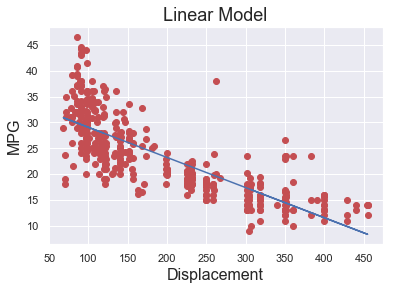

In [68]:
plt.plot(x, y, 'ro')
plt.plot(x, lm.predict(x), 'b')
plt.xlabel('Displacement', size='16')
plt.ylabel('MPG', size='16')
plt.title('Linear Model', size='18')
plt.show()

### Obtengamos indice de puntos locos

In [71]:
data[(data['displacement']>300) & (data['mpg']>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [72]:
data[(data['displacement']>250) & (data['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [119]:
# lista de datos NaN
list_NaN = data[data.isnull().any(1)].index.tolist()

In [120]:
list_NaN = list_NaN + [258, 305, 372, 395]
data_clean = data.drop(list_NaN, axis=0)
print(data.shape)
print(data_clean.shape)

(406, 9)
(388, 9)


In [122]:
x = data_clean['displacement']
y = data_clean['mpg']
# Pasamos x, con una dimension extra para que la función funcione.
x = x[:, np.newaxis]

lm = LinearRegression().fit(x, y)
lm.score(x, y)

0.6703131555875477

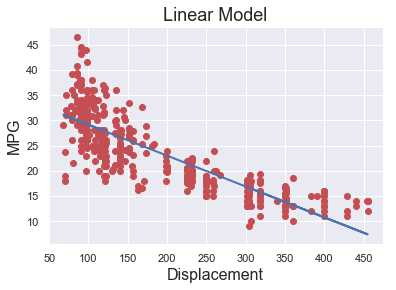

In [128]:
plt.plot(x, y, 'ro')
plt.plot(x, lm.predict(x), 'b', lw=2)
plt.xlabel('Displacement', size='16')
plt.ylabel('MPG', size='16')
plt.title('Linear Model', size='18')
#plt.xlim(349, 352)
#plt.ylim(23, 24)
plt.show()

In [136]:
lm.coef_, lm.intercept_

(array([-0.06123414]), 35.23768934923066)

In [137]:
SSD = np.sum((y - lm.predict(x))**2)
RSE = np.sqrt(SSD / (len(x) - 1))
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(7775.988236260244, 4.482520815183528, 23.40979381443299, 0.19148057649358238)